# APMTH 207: Advanced Scientific Computing: 
## Stochastic Methods for Data Analysis, Inference and Optimization
## Long Homework #3
**Harvard University**<br>
**Spring 2017**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Friday, April 14th, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In this course, we've spent a lot of time learning algorithms for performing inference on complex models and we've spent time using these models to make decisions regarding our data. But in nearly every assignment, the model for the data is specified in the problem statement. In real life, the creative and, arguably, much more difficult task is to start with a broadly defined goal and then to customize or create a model which will meet this goal in some way. In this long homework, we will lead you through the process of model building in simulated real-life conditions. 

In the dataset called "sample_reviews", you'll find a fairly representative selection of Yelp reviews for a (now closed) sushi restaurant called Ino's Sushi in San Francisco. The goal in this assignment is to build a model to help a machine classify any given restaurant (or qualities of a restaurant) as "good" or "bad" given Yelp reviews. 

Problem #1 is atypical as it does not involve any programming or (necessarily) difficult mathematics/statistics, however, answering these questions *seriously* will give you a idea of how one might create or select a model for a particular application and your answers will help you with formalizing the model in Problem #2, which is much more technically involved.


## Problem #1: Understanding Yelp Review Data As a Human

***Grading:*** *We want you to make a genuine effort to mold an ambiguous and broad real-life question into a concrete data science or machine learning problem without the pressure of getting the "right answer". As such, we will grade your answer of Problem #1 on a pass/fail basis. Any reasonable answer that demonstrates actual effort will be given a full grade.*

Read the reviews and form an opinion regarding the various qualities of Ino's Sushi. Answer the following:

- If the task is to summarize the quality of a restaurant in a simple and intuitive way, what might be problemmatic with simply classifying this restaurant as simply "good" or "bad"? Justify your answers with specific examples from the dataset.


- For Ino's Sushi, categorize the food and the service, separately, as "good" or "bad" based on all the reviews in the dataset. Be as systematic as you can when you do this.

  (**Hint:** Begin by summarizing each review. For each review, summarize the reviewer's opinion on two aspects of the restaurant: food and service. That is, generate a classification ("good" or "bad") for each aspect based on what the reviewer writes.) 
  
  
- Identify statistical weaknesses in breaking each review down into an opinion on the food and an opinion on the service. That is, identify types of reviews that make your method of summarizing the reviewer's optinion on the quality of food and service problemmatic, if not impossible. Use examples from your dataset to support your argument. 


- Identify all the ways in which the task in bullet #2 might be difficult for a machine to accomplish. That is, break down the classification task into simple self-contained subtasks and identify how each subtask can be accomplished by a machine (which area of machine learning, e.g. topic modeling, sentiment analysis etc, addressess this type of task).


- Describe a complete pipeline for processing and transforming the data to obtain a classification for both food and service for each review. (You are welcome to use our schema in Problem #2 to help you do this).

# 1a - If the task is to summarize the quality of a restaurant in a simple and intuitive way, what might be problemmatic with simply classifying this restaurant as simply "good" or "bad"? Justify your answers with specific examples from the dataset.

The quality of a restaurant can be evaluated by a variety of different criteria, such as the food, service, location, atmopshere.  A restaurant could be good in some of these categories, but not all of them.  It's difficult to objectively assign a weight to each criterion and rate the restaurant soley as "good" or "bad."  Yet reviewers are arbitrarily assigning weights based on their own preferences:  review 01, 02, and 04 all noted that the food quality was good, yet the service is lacking.  However, review 01 and 04 ranked the restaurant at one star due to the poor service, in spite of the good food, whereas 02 ranked the restaurant at 5 stars, stating the food is "amaaazing" but that the service was "uncomfortable." A better way to classify the restaurant might be to evaluate it on several different criteria and asking cutomers for star rankings on each.

# 1b - For Ino's Sushi, categorize the food and the service, separately, as "good" or "bad" based on all the reviews in the dataset. Be as systematic as you can when you do this.

In [1]:
import pandas as pd

food = pd.Series(["good", "good", "not mentioned", "good", "good", "good", "good", "good", "not mentioned", "good"])
service = pd.Series(["bad", "bad", "bad", "bad", "good", "good", "good", "not mentioned", "bad", "good"])
star_ranking = pd.Series([1, 5, 1, 1, 5, 5, 5, 5, 1, 5])

df = pd.DataFrame({ 'Food' : food, 'Service' : service, "Star Ranking" : star_ranking})
df.index = df.index + 1
df

,Food,Service,Star Ranking
1,good,bad,1
2,good,bad,5
3,not mentioned,bad,1
4,good,bad,1
5,good,good,5
6,good,good,5
7,good,good,5
8,good,not mentioned,5
9,not mentioned,bad,1
10,good,good,5


Here, each review was categorized as good, bad, or not mentioned across two categories: food and service. 8 of the 10 reviewers mentioned the food was good, and all reviewers who had a chance to try the food commented it was good.  Therefore we can reasonably infer that the food quality is good.  The service shows a mixed result.  Of the 10 reviews, 1 did not comment on the service, and 5 contained comments on poor service while 4 noted service was good.  It could be inferred that the service is likely mediocre or not reliably good.  

# 1c - Identify statistical weaknesses in breaking each review down into an opinion on the food and an opinion on the service. That is, identify types of reviews that make your method of summarizing the reviewer's opinion on the quality of food and service problemmatic, if not impossible. Use examples from your dataset to support your argument.

Judging based on two categories can be more informative than the single star ranking currently employed.  However this still presents some issues.  For example - how would we handle reviews with missing info?  Reviews 3, 8, 9 did not specifically commment on either the food or the service.  How would we, for example, handle the lack of comments on food quality by reviewer 9, who did not actually eat at the restaurant, and is therefore unable to comment on the food quality?  Attempting to categorize this particular review as good, bad, or even neutral in terms of food quality would be inaccurate and potentially mislead potential customers.

# 1d -  Identify all the ways in which the task in bullet #2 might be difficult for a machine to accomplish. That is, break down the classification task into simple self-contained subtasks and identify how each subtask can be accomplished by a machine (which area of machine learning, e.g. topic modeling, sentiment analysis etc, addressess this type of task).

In order to evaluate the food and service quality of the reviews, the machine must first break down a review into sentences to look for references to food or service.  

Then the machine must infer whether the overall meaning of the sentence is good or bad using sentiment analysis.  The machine needs to then review the multiple references and sentiments to determine the probability of a review being good or bad for each category.  

Although fairly easy for humans, both of these tasks are difficult for machines due to the complex and ambiguous nature of language, from simlpe synonyms, to colloquialisms that may not be easily deciphered without the relevant cultural context.

# 1e - Describe a complete pipeline for processing and transforming the data to obtain a classification for both food and service for each review. (You are welcome to use our schema in Problem #2 to help you do this).

Here are some steps that can be used to proces and transform the data:

1. Break down each review about the restaurant into sentences
2. Filter out words that are not descriptive, yet are often in sentences, like prepositions.  Possibly further break down the sentences using a tokinizer. 
3. Use naive Bayes (similar to in problem 2) bag of words algorithm to label each sentence as relating to food, service, or other. Run the naive bayes classifier on sentences related to food and service to evaluiate the marginal probability of the sentence being positive. 
4. Look at the mean score of food and service sentences, and if greater than 0.5, classify the review as "good" for the respective food or service category.


## Problem #2: Modeling Your Understanding

In the dataset "reviews_processed.csv", you'll find a database of Yelp reviews for a number of restaurants. These reviews have already been processed and transformed by someone who has completed the (pre) modeling process described in Problem #1. That is, imagine the dataset in "reviews_processed.csv" is the result of feeding the raw Yelp reviews through the pipeline someone build for Problem #1.

The following is a full list of columns in the dataset and their meanings:

I. Relevant to Part A and B:

  1. "review_id" - the unique identifier for each Yelp review
  2. "topic" - the subject addressed by the review (0 stands for food and 1 stands for service)
  3. "rid" - the unique identifier for each restaurant
  4. "count" - the number of sentences in a particular review on a particular topic
  5. "mean" - the probability of a sentence in a particular review on a particular topic being positive, averaged over total number of sentences in the review related to that topic.
  6. "var" - the variance of the probability of a sentence in a particular review on a particular topic being positive, taken over all sentences in the review related to that topic.
  7. (only relevant

II. Relevant (possibly) to Extra Credit:

  1. "uavg" - the average star rating given by a particular reviewer (taken across all their reviews)
  2. "stars" - the number of stars given in a particular review
  3. "max" - the max probability of a sentence in a particular review on a particular topic being positive
  4. "min" - the min probability of a sentence in a particular review on a particular topic being positive

The following schema illustrates the model of the raw data that is used to generate "reviews_processed.csv":
<img src="data/restuarant_model.pdf">

***Warning:*** *this is a "real" data science problem in the sense that the dataset in "reviews_processed.csv" is large. We understand that a number of you have limited computing resources, so you are encouraged but not required to use the entire dataset. If you wish you may use 10 restaurants from the dataset, as long as your choice of 10 contains a couple of restaurants with a large number of reviews and a couple with a small number of reviews.*

### Part A: Modeling

When the value in "count" is low, the "mean" value can be very skewed (refer to your answers for Problem #1 to see why this is a problem if we are interested in summarizing the reviewer's opinion on each aspect of a restaurant).

Following the [SAT prep school example discussed in lab](https://am207.github.io/2017/wiki/gelmanschoolstheory.html) (and using your answers for Problem #1), set up a Bayesian model for a reviewer $j$'s opinion of restaurant $k$'s food and service, separately. That is, you will have a model for each restaurant and each aspect (food and serivce). For restaurant $k$, you will have a model for $\{\theta_{jk}^{\text{food}}\}$ and one for $\{\theta_{jk}^{\text{service}}\}$, where $\theta_{jk}$ is the positivity of the opinion of the $j$-th reviewer regarding the $k$-th restaurant. 

**Hint:** what quantity in our data naturally corresponds to $\bar{y}_j$'s in the prep school example? How would you calculate the parameter $\sigma_j^2$ in the distribution of $\bar{y}_j$ (note that, contrary to the school example, $\sigma_j^2$ is not provided explictly in the restaurant data)?


# How would you calculate the parameter $\sigma_j^2$ in the distribution of $\bar{y}_j$ ?

We can calculate the parameter by dividing by n (number of samples) and taking the square root:

$$\sigma_{jk} = \sqrt{\frac{var_{jk}}{n_{jk}}}$$

$y_j$ corresponds to the mean of our data:

$$ \mu \sim \mathcal{N}(0, 5) $$
$$ \tau \sim \text{Half-Cauchy}(0, 5) $$ 
$$ \nu_j \sim \mathcal{N}(0, 1) $$
$$\theta_{j} \sim \mu + \nu\tau_j \bar{y_{j}} \sim \mathcal{N}(\theta_{j}, \sigma_{j})$$


where $j \in \{1, \ldots, 11417 \}$ and the $\{ y_{j}, \sigma_{j} \}$ are given as our provided data.

In [2]:
import theano
import theano.tensor as T
import pymc3 as pm
from pymc3 import Model,Normal,HalfNormal,Bernoulli,find_MAP,NUTS,sample,Slice,traceplot
import scipy.stats as stats
from sklearn.cross_validation import train_test_split

import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context('paper')

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp

%matplotlib inline
import warnings
warnings.simplefilter('ignore')

reviews_df = pd.read_csv('data/dftouse.csv') 
reviews_df.head(10)

,review_id,topic,rid,count,max,mean,min,stars,uavg,var
0,---sV8KdwfBoDw38KW_WnQ,0,VgLiSW1iGkpzIEXOgvUBEw,5,0.689383,0.558430,0.312919,3,3.285714,0.024112
1,---sV8KdwfBoDw38KW_WnQ,1,VgLiSW1iGkpzIEXOgvUBEw,5,0.816901,0.554300,0.211441,3,3.285714,0.050309
2,--0MzHNy7MVBRvZCOAeRPg,0,4gLecengX1JeGILm7DwU3w,3,0.746711,0.574416,0.360240,5,3.829268,0.038655
3,--0MzHNy7MVBRvZCOAeRPg,1,4gLecengX1JeGILm7DwU3w,6,0.848065,0.657755,0.476156,5,3.829268,0.014583
4,--2NT40xmHh9oBLumzdjhA,0,4ZZab5hinFzHtj3sE8vQWg,5,0.764218,0.601008,0.337710,2,4.181818,0.026742
5,--2NT40xmHh9oBLumzdjhA,1,4ZZab5hinFzHtj3sE8vQWg,4,0.630715,0.467825,0.386750,2,4.181818,0.012157
6,--2Ylq1M_Toj6e0hy_C2XA,0,e9er1p-8RMyRa9IKUzKE-w,4,0.743135,0.613059,0.539191,4,3.500000,0.008469
7,--2Ylq1M_Toj6e0hy_C2XA,1,e9er1p-8RMyRa9IKUzKE-w,1,0.593916,0.593916,0.593916,4,3.500000,0.000000
8,--3QRshg8GhfimzyGWkcAQ,0,T2zItRCqolfzSZR2Io0OZg,2,0.758943,0.756603,0.754264,5,3.250000,0.000011
9,--3QRshg8GhfimzyGWkcAQ,1,T2zItRCqolfzSZR2Io0OZg,1,0.888077,0.888077,0.888077,5,3.250000,0.000000


In [3]:
# the hierarchal model will break down below if it includes values with a variance of zero or less
reviews_df= reviews_df[reviews_df['var'] > 0]

# throw out reviews with only one sentence
reviews = reviews_df[reviews_df['count'] > 1]

# get the number of unique restarants
unique_restaurants = reviews['rid'].unique()
number_of_restaurants = len(unique_restaurants)
print('Total Unique Restaurants Count:', number_of_restaurants)

restaurant = unique_restaurants[20]
restaurant_reviews = reviews[reviews['rid'] == restaurant]
food = restaurant_reviews[restaurant_reviews['topic'] == 0]
service = restaurant_reviews[restaurant_reviews['topic'] == 1]

food_shape = food.shape[0]

# calculate the standard error from the provided sample variance
sigma_j_food = np.sqrt(food['var']/food['count'])
y_j_food = food['mean']
n_j_food = food['count']

service_shape = service.shape[0]

# calculate the standard error from the provided sample variance
sigma_j_service = np.sqrt(service['var']/service['count'])
y_service = service['mean']
n_service = service['count']

Total Unique Restaurants Count: 11417


# Set up the hierarchical model -

In [4]:
# define the hyper-priors 
prior_mean = 0.5
prior_sd = 0.1
cauchy_beta = 0.1
nu_mean = 0
nu_sd = 1

# model for food
with pm.Model() as restaurant_food:
    
    # prior on a probability 
    mu = pm.Normal('mu', mu=prior_mean, sd=prior_sd) 
    
    # our prior on the score we expect for a given review 
    tau = pm.HalfCauchy('tau', beta=cauchy_beta)
    
    # our prior on the variance/se we expect for a given review 
    # (informed by our observed standard errors)
    nu = pm.Normal('nu', mu=nu_mean, sd=nu_sd, shape=food_shape)
    
    # Used so that the variance can be positive or negative when added below
    theta = pm.Deterministic('theta', mu + tau * nu)
    obs = pm.Normal('obs', mu=theta, sd=sigma_j_food, observed=y_j_food)
    
with pm.Model() as restaurant_service:
    
    # prior on a probability 
    mu = pm.Normal('mu', mu=0.6, sd=0.12) 
    
    # our prior on the score we expect for a given review 
    tau = pm.HalfCauchy('tau', beta=0.25)
    
    # our prior on the variance/se we expect for a given review 
    # (informed by our observed standard errors)
    nu = pm.Normal('nu', mu=0, sd=1, shape=service_shape)
    
    # Used so that the variance can be positive or negative when added below
    theta = pm.Deterministic('theta', mu + tau * nu)
    obs = pm.Normal('obs', mu=theta, sd=sigma_j_service, observed=y_service)

# Sampling -

In [6]:
# sample using the entire dataset
with restaurant_food:
    step = pm.NUTS(target_accept=0.95)
    trace_food = pm.sample(5000, njobs=2,progressbar=True)
    
with restaurant_service:
    trace_service = pm.sample(5000, njobs=2)

# try sampling using Previously, we used the entire dataset. Use 10 restaurants 
# from the dataset with 10 having a large number of reviews and a couple with a small number of reviews.
n_restaurants = reviews_df.groupby(['rid','topic']).size().unstack()
n_restaurants['both'] = (n_restaurants[0] >0) & (n_restaurants[1] >0)
rest_with_both_reviews = n_restaurants[n_restaurants.both].index.values
len(n_restaurants),len(rest_with_both_reviews)

reviews_df = reviews_df[reviews_df.rid.isin(rest_with_both_reviews)] 

# the number of restaurants to include in our sample
number_sample_restaurants = 10
  
many_reviews = reviews_df[reviews_df.rid.isin(reviews_df.groupby('rid').size().nlargest(number_sample_restaurants//2).index)]
few_reviews = reviews_df[reviews_df.rid.isin(reviews_df.groupby('rid').size().nsmallest(number_sample_restaurants//2).index)]
sample = pd.concat([many_reviews,few_reviews])
sample = sample[sample['var'] > 0]

reviews_df['sigma'] = np.sqrt((reviews_df['var'] /reviews_df['count']))
traces = dict()
data = dict()

for rid, group in sample.groupby('rid'):
    print('rid:',rid)
    food_sample = group[group.topic ==0].sort_values('rid').reset_index()
    service_sample = group[group.topic ==1].sort_values('rid').reset_index()
    
    # needed for shrinkage plots by rid
    data[(rid +'_food')] = food_sample
    data[(rid +'_service')] = service_sample
     
    num_reviews_food = len(food_sample)
    num_reviews_service = len(service_sample)
    print('Number of Food Reviews:{0}, Number of Service Reviews:{1}'.format(num_reviews_food,num_reviews_service))
    food_mean = food_sample['mean'].mean()
    
    service_mean = service_sample['mean'].mean()

    sigma_food = food_sample['sigma']
    y_food = food_sample['mean']

    sigma_service = service_sample['sigma']
    y_service = service_sample['mean']
                                             
    # model for food 
    food_model = pm.Model()
    with food_model:
        mu = Normal('mu', mu=prior_mean, sd=prior_sd)
        
        # our prior on the score we expect for a given review 
        tau = pm.HalfCauchy('tau', beta=cauchy_beta)
        
        # our prior on the variance/se we expect for a given review 
        # (informed by our observed standard errors)
        nu = pm.Normal('nu', mu=nu_mean, sd=nu_sd, shape=num_reviews_food)
        
        # Used so that the variance can be positive or negative when added below
        theta = pm.Deterministic('theta', mu + tau * nu)
        obs = pm.Normal('obs', mu=theta, sd=sigma_food, observed=y_food)

    # model for service
    service_model = pm.Model()
    with service_model:
        mu = Normal('mu', mu=prior_mean, sd=prior_sd)
        
        # our prior on the score we expect for a given review 
        tau = pm.HalfCauchy('tau', beta=cauchy_beta)
        nu = pm.Normal('nu', mu=nu_mean, sd=nu_sd, shape=num_reviews_service)
        
        # Used so that the variance can be positive or negative when added below
        theta = pm.Deterministic('theta', mu + tau * nu)
        obs = pm.Normal('obs', mu=theta, sd=sigma_service, observed=y_service)
        
    # number of traces to generate         
    n_traces = 1000

    with food_model:
        traces[(rid +'_food')] = pm.sample(n_traces, init=None, njobs=1)                      
    with service_model:
        traces[(rid +'_service')] = pm.sample(n_traces, init=None, njobs=1)


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = 0.72593: 100%|██████████| 200000/200000 [00:11<00:00, 17128.39it/s]
Finished [100%]: Average ELBO = 0.73258
Evidence of divergence detected, inspect ELBO.
100%|██████████| 5000/5000 [00:09<00:00, 531.83it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = 1.2626: 100%|██████████| 200000/200000 [00:11<00:00, 17537.16it/s]
Finished [100%]: Average ELBO = 1.3594
Evidence of divergence detected, inspect ELBO.
100%|██████████| 5000/5000 [00:10<00:00, 498.55it/s]
Assigned NUTS to mu
Assigned NUTS to tau_log_
Assigned NUTS to nu


rid: -6ozQS5Mc6xDyGFNLNh7ZA
Number of Food Reviews:8, Number of Service Reviews:8


100%|██████████| 1000/1000 [00:02<00:00, 356.88it/s]
Assigned NUTS to mu
Assigned NUTS to tau_log_
Assigned NUTS to nu
100%|██████████| 1000/1000 [00:02<00:00, 441.18it/s]
Assigned NUTS to mu
Assigned NUTS to tau_log_
Assigned NUTS to nu


rid: 3Igoz7noWksymLqoMWuzRg
Number of Food Reviews:1, Number of Service Reviews:1


100%|██████████| 1000/1000 [00:01<00:00, 919.62it/s]
Assigned NUTS to mu
Assigned NUTS to tau_log_
Assigned NUTS to nu
100%|██████████| 1000/1000 [00:00<00:00, 1345.45it/s]
Assigned NUTS to mu
Assigned NUTS to tau_log_
Assigned NUTS to nu


rid: 3Nt3CA4IDxt0SeQO24gb-Q
Number of Food Reviews:8, Number of Service Reviews:8


100%|██████████| 1000/1000 [00:01<00:00, 687.29it/s]
Assigned NUTS to mu
Assigned NUTS to tau_log_
Assigned NUTS to nu
100%|██████████| 1000/1000 [00:02<00:00, 497.48it/s]
Assigned NUTS to mu
Assigned NUTS to tau_log_
Assigned NUTS to nu


rid: 48GT-uIRnHp3rHvdRsgC_Q
Number of Food Reviews:8, Number of Service Reviews:8


100%|██████████| 1000/1000 [00:01<00:00, 650.68it/s]
Assigned NUTS to mu
Assigned NUTS to tau_log_
Assigned NUTS to nu
100%|██████████| 1000/1000 [00:02<00:00, 435.71it/s]
Assigned NUTS to mu
Assigned NUTS to tau_log_
Assigned NUTS to nu


rid: 4Iqcne2F4qY8lahrPA81rA
Number of Food Reviews:8, Number of Service Reviews:8


100%|██████████| 1000/1000 [00:02<00:00, 468.43it/s]
Assigned NUTS to mu
Assigned NUTS to tau_log_
Assigned NUTS to nu
100%|██████████| 1000/1000 [00:02<00:00, 394.35it/s]
Assigned NUTS to mu
Assigned NUTS to tau_log_
Assigned NUTS to nu


rid: 7lFWEsNkTR0RwI4Dvhueww
Number of Food Reviews:8, Number of Service Reviews:8


100%|██████████| 1000/1000 [00:02<00:00, 407.87it/s]
Assigned NUTS to mu
Assigned NUTS to tau_log_
Assigned NUTS to nu
100%|██████████| 1000/1000 [00:07<00:00, 131.03it/s]
Assigned NUTS to mu
Assigned NUTS to tau_log_
Assigned NUTS to nu


rid: Pl1qDTX90DSLHo-ZAlAh9w
Number of Food Reviews:1, Number of Service Reviews:1


100%|██████████| 1000/1000 [00:00<00:00, 1114.61it/s]
Assigned NUTS to mu
Assigned NUTS to tau_log_
Assigned NUTS to nu
100%|██████████| 1000/1000 [00:01<00:00, 963.99it/s]
Assigned NUTS to mu
Assigned NUTS to tau_log_
Assigned NUTS to nu


rid: U0Up9AYSClGwmuqo-ZJVzw
Number of Food Reviews:1, Number of Service Reviews:1


100%|██████████| 1000/1000 [00:01<00:00, 861.40it/s]
Assigned NUTS to mu
Assigned NUTS to tau_log_
Assigned NUTS to nu
100%|██████████| 1000/1000 [00:05<00:00, 171.67it/s]
Assigned NUTS to mu
Assigned NUTS to tau_log_
Assigned NUTS to nu


rid: dn0yw0WPTsH8P0SAstDQWw
Number of Food Reviews:1, Number of Service Reviews:1


100%|██████████| 1000/1000 [00:00<00:00, 1171.21it/s]
Assigned NUTS to mu
Assigned NUTS to tau_log_
Assigned NUTS to nu
100%|██████████| 1000/1000 [00:01<00:00, 590.01it/s]
Assigned NUTS to mu
Assigned NUTS to tau_log_
Assigned NUTS to nu


rid: dneZINl9Tz_W2ixadIOdQA
Number of Food Reviews:1, Number of Service Reviews:1


100%|██████████| 1000/1000 [00:00<00:00, 1216.05it/s]
Assigned NUTS to mu
Assigned NUTS to tau_log_
Assigned NUTS to nu
100%|██████████| 1000/1000 [00:00<00:00, 1229.74it/s]


# Trace plot for food -

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1209d6b70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x138dadf98>]], dtype=object)

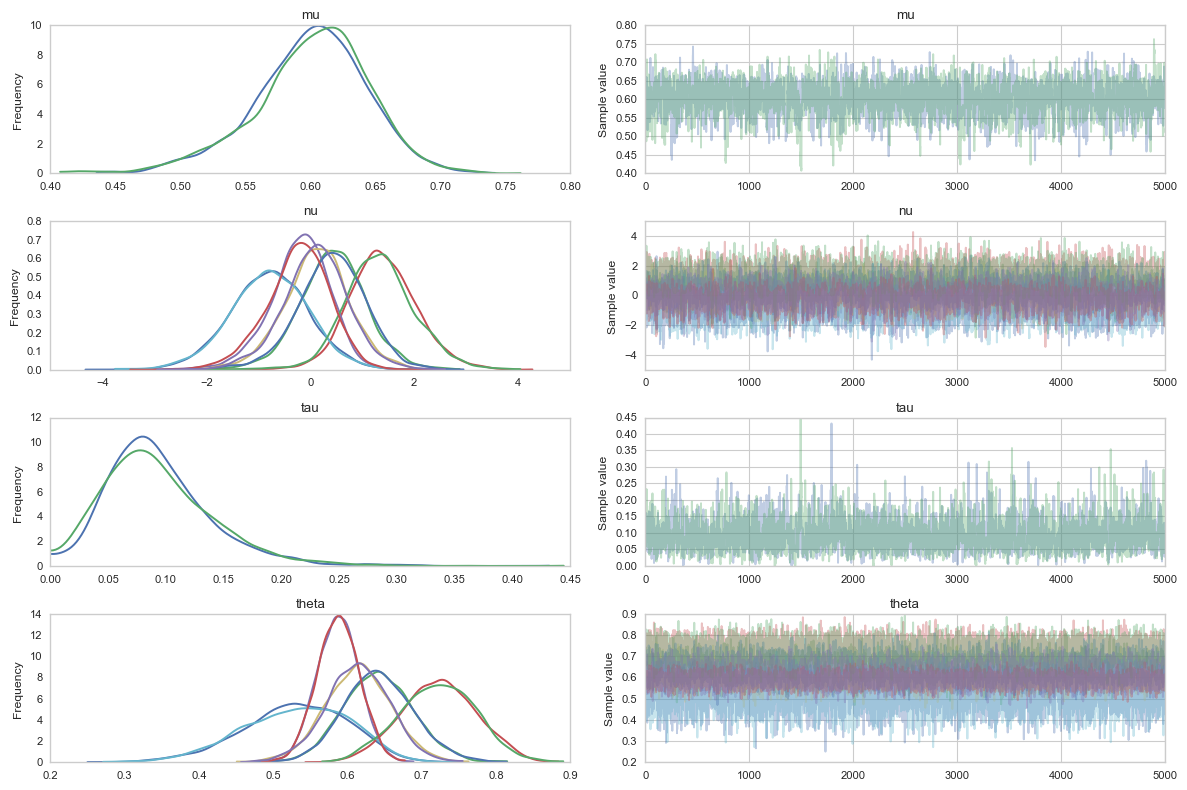

In [7]:
pm.traceplot(trace_food)

# Trace plot for service -

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1397656d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13ad90c88>]], dtype=object)

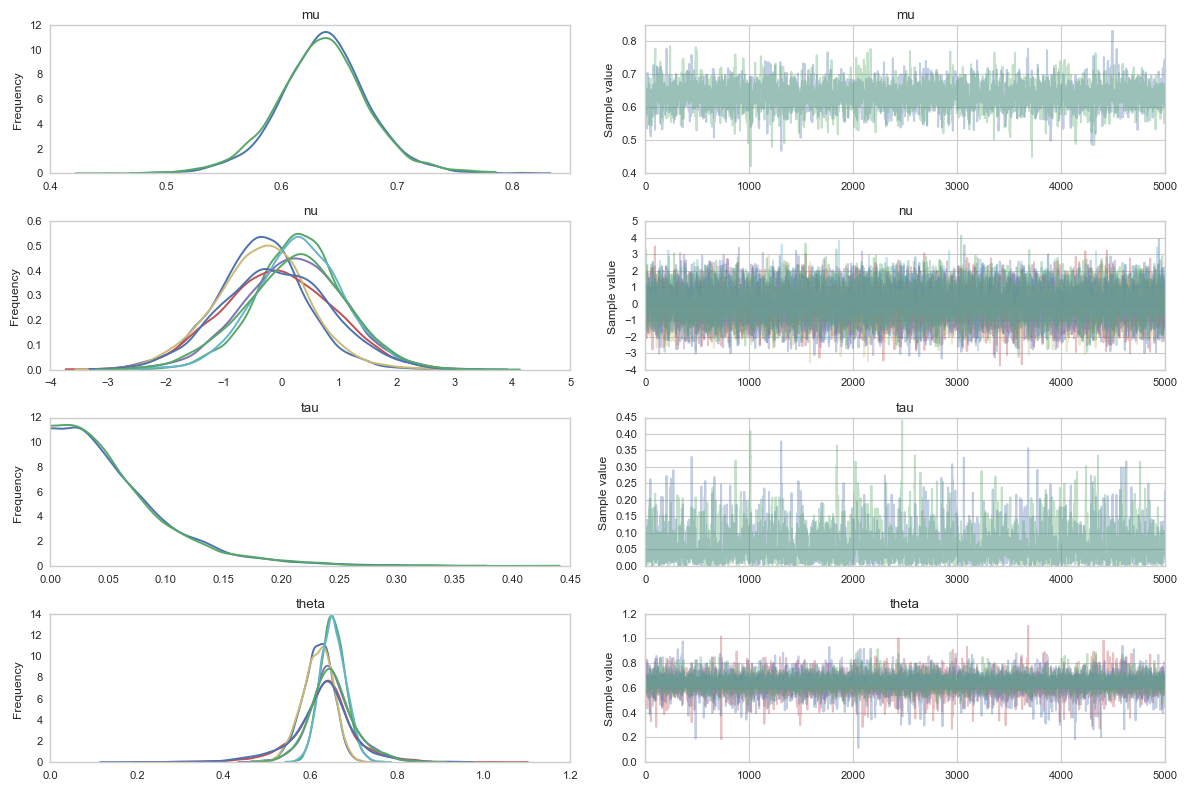

In [8]:
pm.traceplot(trace_service)

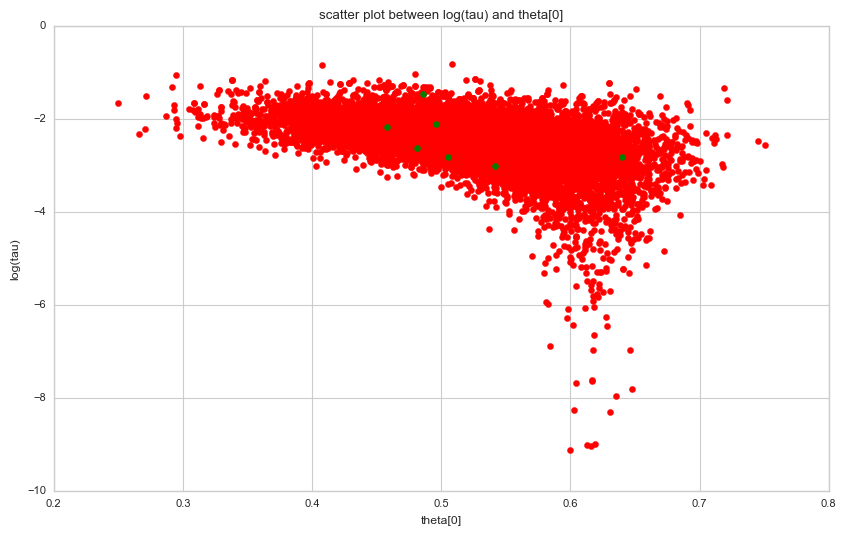

In [9]:
theta_trace = trace_food['theta']
logtau = trace_food['tau_log_']
divergent = trace_food['diverging']
theta0 = theta_trace[:, 0]
plt.figure(figsize=(10, 6))
plt.scatter(theta0[divergent == 0], logtau[divergent == 0], color='r')
plt.scatter(theta0[divergent == 1], logtau[divergent == 1], color='g')
plt.ylabel('log(tau)')
plt.xlabel('theta[0]')
plt.title('scatter plot between log(tau) and theta[0]')
plt.show()

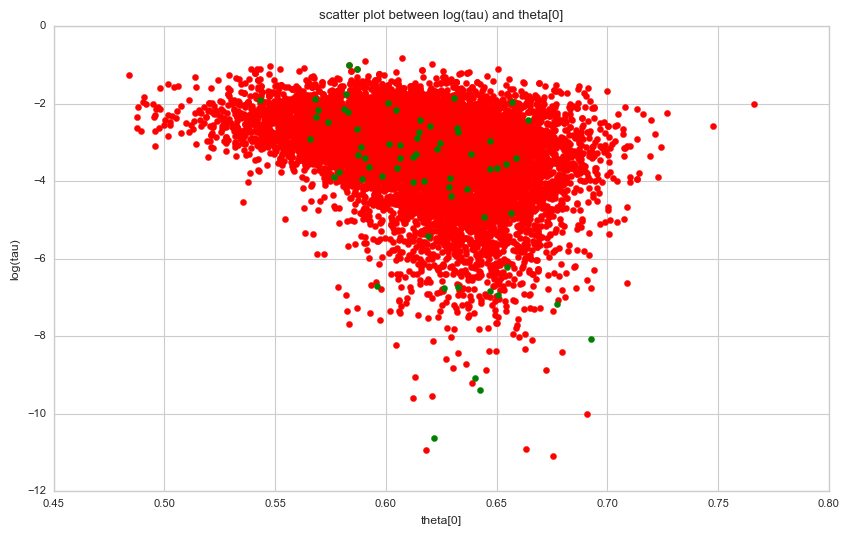

In [10]:
theta_trace = trace_service['theta']
logtau = trace_service['tau_log_']
divergent = trace_service['diverging']
theta0 = theta_trace[:, 0]
plt.figure(figsize=(10, 6))
plt.scatter(theta0[divergent == 0], logtau[divergent == 0], color='r')
plt.scatter(theta0[divergent == 1], logtau[divergent == 1], color='g')
plt.ylabel('log(tau)')
plt.xlabel('theta[0]')
plt.title('scatter plot between log(tau) and theta[0]')
plt.show()

The scatter plots of trace divergences show that we have explored effectively and there seems to be a relatively uniform distribution based on the divergences and number of samples.

### Part B: Analysis for Each restaurant

Use your model to produce estimates for $\theta_{jk}$'s. Pick a few restaurants, for each aspect ("food" and "service") of each restaurant, plot your estimates for the $\theta$'s against the values in the "mean" column (corresponding to this restaurant. 

For the same restaurants, for each aspect, generate shrinkage plots as follows:

<img src="data/shrinkage.png">

The $x$-axis is the posterior means, the $y$-axis is classification probability (1-cdf) or fraction of predictive samples. The colored lines are error bars. (The code to generate this plot is included in this notebook.)

Use these plots to discuss the statistical benefits of modeling each reviewer's opinion as you did in Part A, rather than approximating the reviewer opinion with the value in "mean".



In [30]:
import itertools

# fix a restaurant and an aspect (food or service)
# "means" is the array of values in the "mean" column for the restaurant and the aspect 
#         in the dataset
# "thetas" is the array of values representing your estimate of the opinions of reviewers 
#          regarding this aspect of this particular restaurant
# "mean_vars" is the array of values of the variances from the 'var' column of the dataset
# "theta_vars" is the array of values of the variances of the theta values
# "counts" is the array of values in the "count" column for the restaurant and the aspect 
#.         in the dataset

def shrinkage_plot(means, thetas, mean_vars, theta_vars, counts):
    data = zip(means, thetas, mean_vars / counts, theta_vars, counts)

    palette = itertools.cycle(sns.color_palette())
    with sns.axes_style('white'):
        for m,t, me2, te2, c in data:
            color=next(palette)
            noise=0.04*np.random.randn()
            noise2=0.04*np.random.randn()
            plt.plot([m,t],[noise,1+noise2],'o-', color=color, lw=1)
            if me2==0:
                me2=4
            plt.errorbar([m,t],[noise,1+noise2], xerr=[np.sqrt(me2), np.sqrt(te2)], color=color,  lw=1)
        plt.yticks([])
        plt.xlim([0,1])
        sns.despine(offset=-2, trim=True, left=True)
    return plt.gca()

def create_subplot(df,trace,rid):
    means = np.array(df['mean'])
    thetas = [theta.mean() for theta in trace['theta']]
    mean_vars = df['var']
    theta_vars = df['sigma']
    counts = df['count']
    shrinkage_plot(means, thetas, mean_vars, theta_vars, counts)
    plt.axvline(x=trace.mu.mean(),ls='dashed', linewidth=2, color='r')
    plt.xlabel("Mean:{0:.3f}\nObs Mean:{1:.3f}".format(trace.mu.mean(),means.mean()), fontsize=18)
    
def create_shrinkage_plot_using_rid(rid):
    
    plt.subplot(1,2,1)
    create_subplot(data[(rid+'_food')],traces[(rid+'_food')],rid)
    plt.ylabel(r"Empirical means - Theta means", fontsize=18)
    plt.title('Shrinkage Plot - Food \n rid:{0}'.format(rid), fontsize=18)
    
    plt.subplot(1,2,2)
    create_subplot(data[(rid+'_service')],traces[(rid+'_service')],rid)    
    plt.title('Shrinkage Plot - Service \n rid:{0}'.format(rid), fontsize=18)

In [31]:
data = dict()

# number of restaurants to include in our sample  
number_sample_restaurants = 10

many_reviews = reviews_df[reviews_df.rid.isin(reviews_df.groupby('rid').size().nlargest(number_sample_restaurants//2).index)]
few_reviews = reviews_df[reviews_df.rid.isin(reviews_df.groupby('rid').size().nsmallest(number_sample_restaurants//2).index)]
sample = pd.concat([many_reviews,few_reviews])

# our hierarchal model breaks down below if we include values with zero variance 
sample = sample[sample['var'] > 0]

sample.head()

,review_id,topic,rid,count,max,mean,min,stars,uavg,var,sigma
5771,1TLhVBdyuLaEP9U5ucn1FQ,0,7lFWEsNkTR0RwI4Dvhueww,3,0.773746,0.637606,0.527188,5,3.627660,0.015694,0.072328
5772,1TLhVBdyuLaEP9U5ucn1FQ,1,7lFWEsNkTR0RwI4Dvhueww,6,0.906176,0.640011,0.502335,5,3.627660,0.019250,0.056642
6184,1dtTcoEu42Pc-IRNv_Kj4w,0,-6ozQS5Mc6xDyGFNLNh7ZA,5,0.832139,0.632380,0.500777,4,3.500000,0.016953,0.058229
6185,1dtTcoEu42Pc-IRNv_Kj4w,1,-6ozQS5Mc6xDyGFNLNh7ZA,2,0.935573,0.867278,0.798984,4,3.500000,0.009328,0.068294
10908,3f4dvrd7Uk8WrTgC_aLA_w,0,4Iqcne2F4qY8lahrPA81rA,3,0.764218,0.684090,0.600250,5,3.771357,0.006732,0.047370


In [32]:
for rid, group in sample.groupby('rid'):
    print('RID:',rid)
    food_sample = group[group.topic ==0].sort_values('rid').reset_index()
    service_sample = group[group.topic ==1].sort_values('rid').reset_index()
    data[(rid +'_food')] = food_sample
    data[(rid +'_service')] = service_sample
    # Store df slice so we can access it later with same indexing for shrinkage plots 

RID: -6ozQS5Mc6xDyGFNLNh7ZA
RID: 3Igoz7noWksymLqoMWuzRg
RID: 3Nt3CA4IDxt0SeQO24gb-Q
RID: 48GT-uIRnHp3rHvdRsgC_Q
RID: 4Iqcne2F4qY8lahrPA81rA
RID: 7lFWEsNkTR0RwI4Dvhueww
RID: Pl1qDTX90DSLHo-ZAlAh9w
RID: U0Up9AYSClGwmuqo-ZJVzw
RID: dn0yw0WPTsH8P0SAstDQWw
RID: dneZINl9Tz_W2ixadIOdQA


# plot your estimates for the  θ 's against the values in the "mean" column (corresponding to this restaurant - restaurant with many reviews:

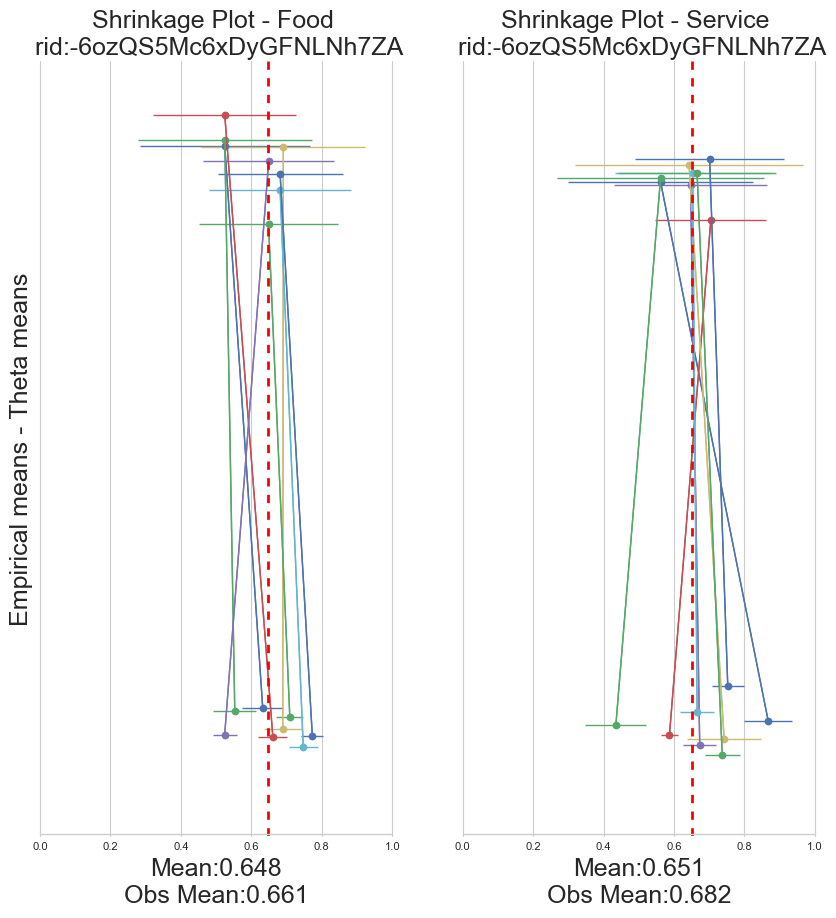

In [33]:
plt.figure(figsize=(10,10))
create_shrinkage_plot_using_rid('-6ozQS5Mc6xDyGFNLNh7ZA')

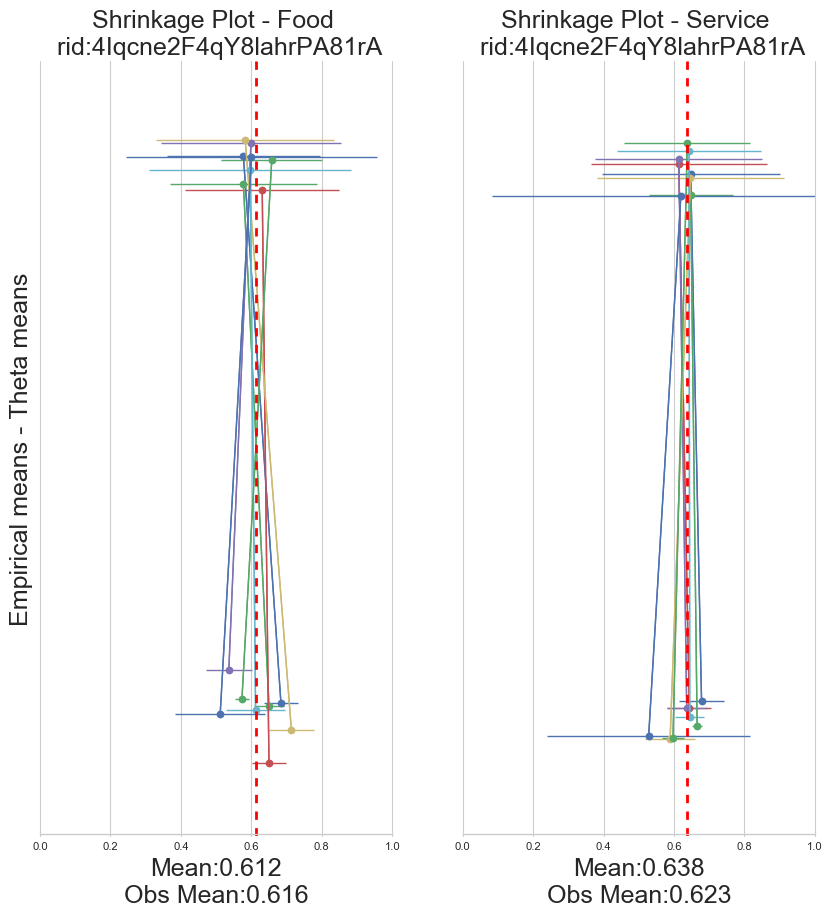

In [35]:
plt.figure(figsize=(10,10))
create_shrinkage_plot_using_rid('4Iqcne2F4qY8lahrPA81rA')

# plot your estimates for the  θ 's against the values in the "mean" column (corresponding to this restaurant - few reviews:

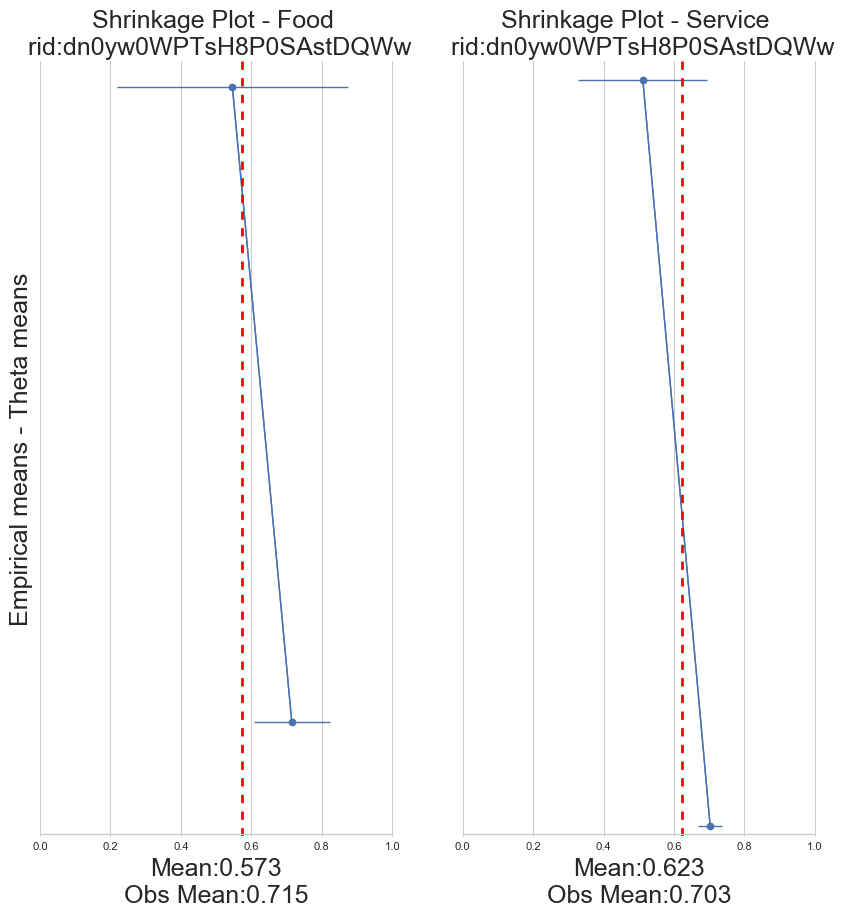

In [37]:
plt.figure(figsize=(10,10))
create_shrinkage_plot_using_rid('dn0yw0WPTsH8P0SAstDQWw')

# Part B : Use these plots to discuss the statistical benefits of modeling each reviewer's opinion as you did in Part A, rather than approximating the reviewer opinion with the value in "mean".

By modeling each reviewer's opinion, we are attempting to improve the estimation as as opposed to a simple approximation using the mean. Using what we learn from each review, we can then update the estimated score for each restaurant.

As shown in the above plots, we tend to get better averages when looking at reviews for each restaurant, but we tend lose specific info about each restaurant. Lastly, when there is only one review for each category, the model mean simply trends towards the prior mean.

### Part C: Analysis Across Restaurants

Aggregate, in a simple but reasonable way, the reviewer's opinions to given a pair of overall scores for each restaurant, one for food and one for service. Rank the restaurants by food score and then by service score. Discuss the statistical weakness of ranking by these scores.

(**Hint:** what is statistically problemmatic about the way you aggregated the reviews of each restaurant to produce an overall food or service score? You've see this question addressed a number of times in previous homeworks, e.g. Homework #7 and Homework #6. This is also the same problem with summarizing a reviewer's opinion on a restaurants service and food based on what they write.)

In [38]:
def get_count(row):
    rid=row.name
    return len(reviews_df[reviews_df.rid==rid])

sample_scores = dict()
for rid in sample.rid.unique():
    sample_scores[rid] = {'food':traces[(rid+'_food')].mu.mean(),\
                  'service':traces[(rid+'_service')].mu.mean()}

sample_scores = pd.DataFrame(sample_scores).T
sample_scores['mean'] = (sample_scores.food + sample_scores.service)/2
sample_scores['n_of_reviews']  = sample_scores.apply(get_count,axis=1)
sample_scores.sort_values('mean',ascending=False)

sample_scores.columns = ['Food Score', 'Service Score', 'Mean', 'Number of Reviews']
sample_scores.index.name = 'rid'
sample_scores.head(10)

,Food Score,Service Score,Mean,Number of Reviews
rid,,,,
-6ozQS5Mc6xDyGFNLNh7ZA,0.647745,0.651183,0.649464,16
3Igoz7noWksymLqoMWuzRg,0.540287,0.532050,0.536168,2
3Nt3CA4IDxt0SeQO24gb-Q,0.625121,0.631273,0.628197,16
48GT-uIRnHp3rHvdRsgC_Q,0.620427,0.634747,0.627587,16
4Iqcne2F4qY8lahrPA81rA,0.612005,0.637603,0.624804,16
7lFWEsNkTR0RwI4Dvhueww,0.649212,0.644409,0.646811,16
Pl1qDTX90DSLHo-ZAlAh9w,0.565422,0.522719,0.544070,2
U0Up9AYSClGwmuqo-ZJVzw,0.557110,0.724330,0.640720,2
dn0yw0WPTsH8P0SAstDQWw,0.573224,0.622975,0.598099,2


There are several obvious weaknesses with this approach.  The table above is an unweighted score using the mean of the model estimate of food and service. In the case that there are 8 reviews in one cateogry and only one in the other, a simple calculated mean will weigh both equally. 

While the model does attempt to correct for this by regularizing the restaurants with less data to be closer to the prior mean value of 0.5, this is not an adequate fix.  Case in point, while many top rankted restaurants have many reviews, the second best rated restaurant comprises only of two reviews, one in each category.  Based on the above it seems that if only a few reviews are available for a given restaurant, the scores will be skewed.

### Extra Credit:

Propose a model, that addresses the weakness of your approach in Part C, for the overall quality of food and service for each restaurant given the $\theta$'s. Combine your model for the overall quality with your model for the $\theta$'s. Use this combined model to estimate the overall quality of food and service for each restaurant.

(**Hint:** Homework #7 is a good reference for building your model for the overall quality of food and service of these restaurants. Specifically, thinking about pooling.)


# Propose a model, that addresses the weakness of your approach in Part C

In order to address the weaknesses of the previous model, I would propose using pooling to remediate the need for a weighted average.  More specifically I would use a beta binomial model (good / bad) with a theta threshold above 0.5.  This will transform the classifications into a binary, allowing the use of a poisson gamma.  

Next to simplify sampling I would utilize the following: 
    Half-Cauchy - conditionally conjugate + weakly informative

We can then model y as follows based on Gelman Schools Theory discussed  in lecture https://am207.github.io/2017/wiki/gelmanschoolstheory.html

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -13.757: 100%|██████████| 200000/200000 [00:15<00:00, 12768.11it/s]
Finished [100%]: Average ELBO = -13.879
100%|██████████| 5000/5000 [00:12<00:00, 390.65it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x139f45a20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1340d90f0>]], dtype=object)

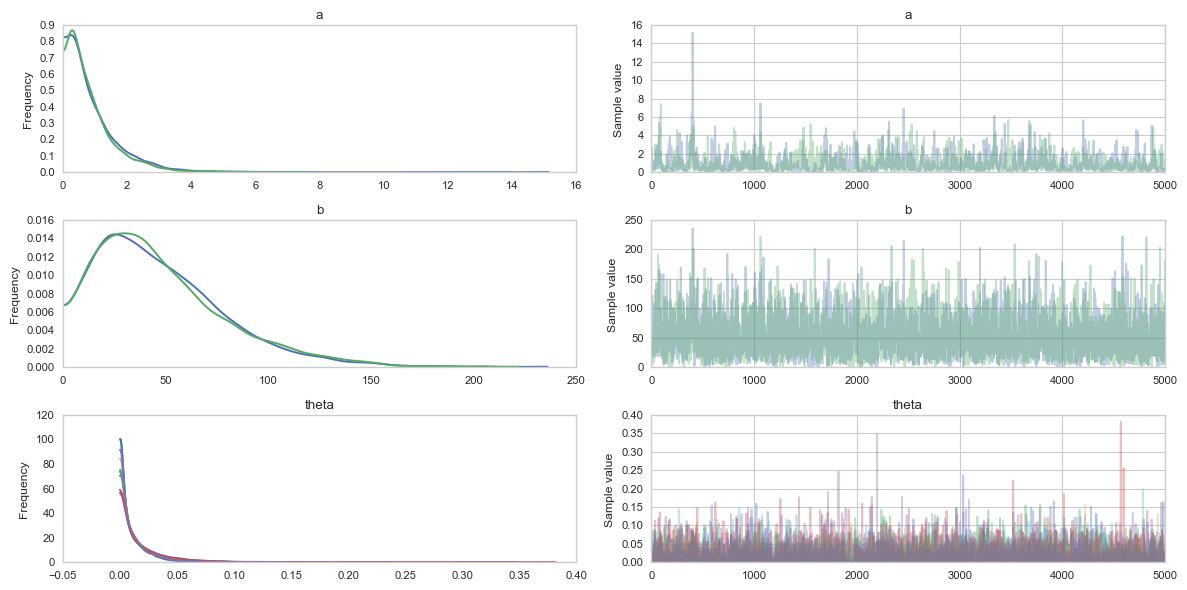

In [39]:
# create the new model for sampling
with pm.Model() as pg:
    
    # set the prior on a probability
    a = pm.Gamma('a', 2, 0.012)  
    b = pm.Gamma('b', 1, 0.05)
    
    # used so that the variance can be positive or negative when added below
    theta = pm.Gamma('theta', a, b, shape=food_shape)
    y = pm.Poisson('y',mu=5*np.array(n_j_food)*theta, observed=y_j_food)

# sample 
with pg:
    trace_pg = pm.sample(5000, njobs=2)
    
pm.traceplot(trace_pg)

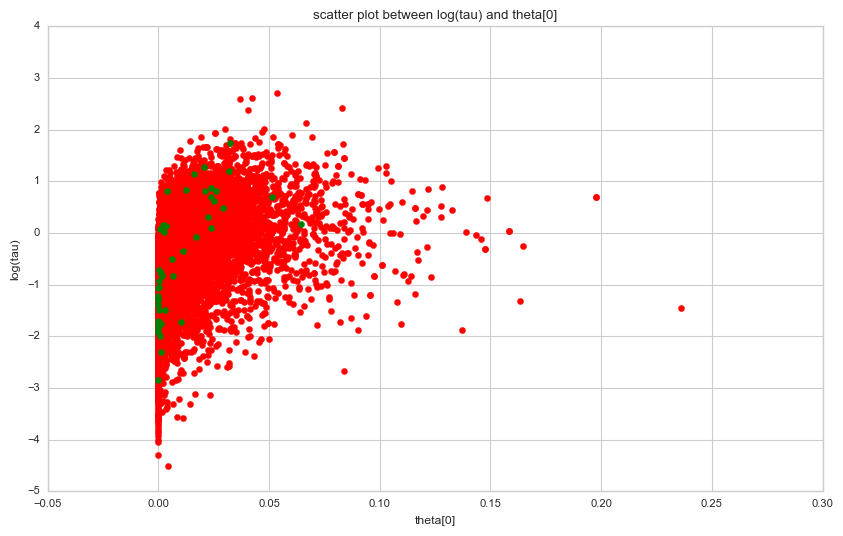

In [40]:
theta_trace = trace_pg['theta']
logtau = trace_pg['a_log_']
divergent = trace_pg['diverging']
theta0 = theta_trace[:, 0]
plt.figure(figsize=(10, 6))
plt.scatter(theta0[divergent == 0], logtau[divergent == 0], color='r')
plt.scatter(theta0[divergent == 1], logtau[divergent == 1], color='g')
plt.ylabel('log(tau)')
plt.xlabel('theta[0]')
plt.title('scatter plot between log(tau) and theta[0]')
plt.show()


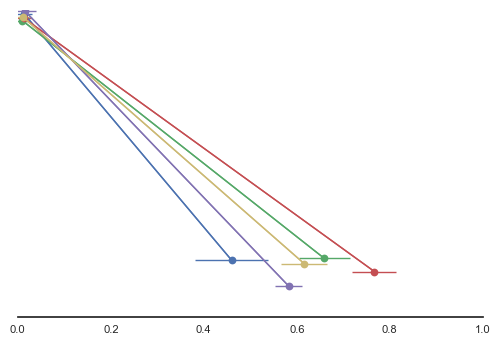

In [41]:
mean_theta_service = np.mean(trace_pg['theta'], axis=0)
theta_vars_service = np.var(trace_pg['theta'], axis=0)
shrinkage_plot(food['mean'], mean_theta_service, food['var'], theta_vars_service, food['count'])